In [64]:
import requests
from bs4 import BeautifulSoup
import urllib.request
import matplotlib.pyplot as plt
import datetime
from datetime import datetime
from datetime import date
import re
import time
import numpy as np
from collections import Counter
%matplotlib inline

In [3]:
def get_tag_text(html,tag_opener,stars=False,date=False):
    '''
    get either stars, reviews or dates of reviews for a product given an html page of its review
    tag_opener just first part of tag'''
    out = []
    index = 0
    offset = len(tag_opener)
    while index<len(html):
        try:
            
            index = html.index(tag_opener)
            new_html = html[index+offset:]
            end_index = new_html.index("</")
            
            out.append(new_html[:end_index])
            new_end = new_html[end_index:].index(">")
            html = new_html[new_end+1:]
        except:
            break
    if date: 
        out = out[2:]
        for i in range(len(out)):
            out[i] = parse_date(out[i])
    if stars:
        out = out[3:-5]
        for i in range(len(out)):
            out[i] = float(out[i].split()[0])
    return out
def scrape_review(url):
    '''
    Get HTML page source 
    '''
    user_agent = 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/35.0.1916.47 Safari/537.36'
    site = requests.get('{}'.format(url),headers = {'User-Agent':user_agent})
    source = BeautifulSoup(site.text, 'html.parser')
    return str(source)

def get_all_reviews(url,num_pages):
    '''
    Get all reviews given a url to product reviews and number of pages for that product
    '''
    stars = []
    reviews = []
    dates = []
    base = url[:-1]
    for i in range(1,num_pages+1):
        url = base+"{}".format(i)
        html = scrape_review(url)
        stars.extend(get_tag_text(html,'<span class="a-icon-alt">',True,False))
        reviews.extend(get_tag_text(html,'<span data-hook="review-body" class="a-size-base review-text">'))
        dates.extend(get_tag_text(html,'review-date">',False,True))
    return stars,reviews,dates
def parse_date(date_str):
    '''
    Parses date, get num days from a base_date(used for reference)
    '''
    base_date = date(2013,1,1) #NOTE Daniel Wellington Starts in 2011
    month_dict = {'Jan' : 1,
        'Feb' : 2,
        'Mar' : 3,
        'Apr' : 4,
        'May' : 5,
        'Jun' : 6,
        'Jul' : 7,
        'Aug' : 8,
        'Sep' : 9, 
        'Oct' : 10,
        'Nov' : 11,
        'Dec' : 12}
    date_str = re.sub(r'[^\w\s]','',date_str)
    split = date_str.split()
    m,d,y = month_dict[split[0][:3]],int(split[1]),int(split[2])
    return (date(y,m,d)-base_date).days


In [4]:
url1 = 'https://www.amazon.com/Daniel-Wellington-0507DW-Classic-Stainless/product-reviews/B00BKQT6WQ/ref=cm_cr_getr_d_paging_btm_1?ie=UTF8&reviewerType=all_reviews&pageNumber=1'
num_pages1 = 29
s1,r1,d1 = get_all_reviews(url1,num_pages1)

In [5]:
url2 = 'https://www.amazon.com/Daniel-Wellington-0508DW-Sheffield-Leather/product-reviews/B00BKQT80Q/ref=cm_cr_getr_d_paging_btm_1?ie=UTF8&reviewerType=all_reviews&pageNumber=1'
num_pages2 = 28
s2,r2,d2 = get_all_reviews(url2,num_pages2)

In [6]:
url3 = 'https://www.amazon.com/Daniel-Wellington-0511DW-Classic-Bristol/product-reviews/B00EX1GLXM/ref=cm_cr_arp_d_paging_btm_2?ie=UTF8&reviewerType=all_reviews&pageNumber=2'
num_pages3 = 14
s3,r3,d3 = get_all_reviews(url3,num_pages3)

In [7]:
url4 = 'https://www.amazon.com/Daniel-Wellington-0608DW-Sheffield-Stainless/product-reviews/B00BKQTA4A/ref=cm_cr_arp_d_paging_btm_2?ie=UTF8&reviewerType=all_reviews&pageNumber=2'
num_pages4 = 13
s4,r4,d4 = get_all_reviews(url4,num_pages4)

In [8]:
url5 = 'https://www.amazon.com/Vincero-Luxury-Chrono-Wrist-Watch/product-reviews/B06Y391SCN/ref=cm_cr_arp_d_paging_btm_2?ie=UTF8&reviewerType=all_reviews&pageNumber=2'
num_pages5 = 56
s5,r5,d5 = get_all_reviews(url5,num_pages5)

In [9]:
url6 = 'https://www.amazon.com/Daniel-Wellington-0901DW-Sheffield-Leather/product-reviews/B00D198MHU/ref=cm_cr_arp_d_paging_btm_2?ie=UTF8&reviewerType=all_reviews&pageNumber=2'
num_pages6 = 11
s6,r6,d6 = get_all_reviews(url6,num_pages6)

In [10]:
url7 = 'https://www.amazon.com/Daniel-Wellington-Womens-0900DW-Stainless/product-reviews/B00D195O3K/ref=cm_cr_arp_d_paging_btm_2?ie=UTF8&reviewerType=all_reviews&pageNumber=2'
num_pages7 = 15
s7,r7,d7 = get_all_reviews(url7,num_pages7)

In [11]:
url8 = 'https://www.amazon.com/Daniel-Wellington-Classic-Cambridge-40mm/product-reviews/B00BKQT54A/ref=cm_cr_arp_d_paging_btm_2?ie=UTF8&reviewerType=all_reviews&pageNumber=2'
num_pages8 = 9
s8,r8,d8 = get_all_reviews(url8,num_pages8)

In [12]:
url9 = 'https://www.amazon.com/Daniel-Wellington-Classic-Canterbury-36mm/product-reviews/B00BKQT590/ref=cm_cr_arp_d_paging_btm_7?ie=UTF8&reviewerType=all_reviews&pageNumber=7'
num_pages9 = 7
s9,r9,d9 = get_all_reviews(url9,num_pages9)

In [13]:
url10 = 'https://www.amazon.com/Daniel-Wellington-Womens-0607DW-Leather/product-reviews/B00BKQT9XC/ref=cm_cr_arp_d_paging_btm_2?ie=UTF8&reviewerType=all_reviews&pageNumber=2'
num_pages10 = 10
s10,r10,d10 = get_all_reviews(url10,num_pages10)

In [14]:
url11 = 'https://www.amazon.com/Daniel-Wellington-0101DW-Classic-Gold-Tone/product-reviews/B00BKQT4JG/ref=cm_cr_arp_d_paging_btm_2?ie=UTF8&reviewerType=all_reviews&pageNumber=2'
num_pages11=8
s11,r11,d11 = get_all_reviews(url11,num_pages11)

In [15]:
url12 = 'https://www.amazon.com/Daniel-Wellington-0209DW-Bristol-Stainless/product-reviews/B00BKQT8RE/ref=cm_cr_arp_d_paging_btm_2?ie=UTF8&reviewerType=all_reviews&pageNumber=2'
num_pages12=8
s12,r12,d12 = get_all_reviews(url12,num_pages12)

In [16]:
url13 = 'https://www.amazon.com/Daniel-Wellington-0111DW-Classic-Stainless/product-reviews/B00BKQT6U8/ref=cm_cr_arp_d_paging_btm_6?ie=UTF8&reviewerType=all_reviews&pageNumber=6'
num_pages13=6
s13,r13,d13 = get_all_reviews(url13,num_pages13)

In [17]:
url14 = 'https://www.amazon.com/Daniel-Wellington-Classic-Glasgow-40mm/product-reviews/B00BKQT7LG/ref=cm_cr_arp_d_paging_btm_8?ie=UTF8&reviewerType=all_reviews&pageNumber=8'
num_pages14=8
s14,r14,d14 = get_all_reviews(url14,num_pages14)

In [18]:
url15 = 'https://www.amazon.com/Daniel-Wellington-Womens-0607DW-Leather/product-reviews/B00BKQT9XC/ref=cm_cr_arp_d_paging_btm_2?ie=UTF8&reviewerType=all_reviews&pageNumber=2'
num_pages15=10
s15,r15,d15 = get_all_reviews(url15,num_pages15)

In [19]:
# print(len(get_tag_text(html,'<span class="a-icon-alt">',True)))
# print(len(get_tag_text(html,'review-date">',False,True)))
# print(len(get_tag_text(html,'<span data-hook="review-body" class="a-size-base review-text">')))
# # <span data-hook="review-body" class="a-size-base review-text">Dont buy its fake I contacted the sugar bear original website and they confirmed to me that the bottles I received is not the original sugar bear the barcode doesn‚Äôt match with the original sugarbear</span>

In [20]:
def helprint():
    num_prod = 15
    l1 = "all_dates = ["
    d_arr = []
    l2="all_stars = ["
    s_arr = []
    l3="all_reviews = ["
    r_arr = []
    l5 = "combined_counter = "
    c_arr = []
    for i in range(1,num_prod+1):
        d_arr.append("d{}".format(i))
        s_arr.append("s{}".format(i))
        r_arr.append("r{}".format(i))
        c_arr.append("all_counter[{}]".format(i-1))
    l1+=",".join(d_arr)+"]"
    l2+=",".join(s_arr)+"]"
    l3+=",".join(r_arr)+"]"
    l5+="+".join(c_arr)
    print(l1)
    print(l2)
    print(l3)
    print("all_counter = [Counter(d) for d in all_dates]")
    print(l5)
helprint()


all_dates = [d1,d2,d3,d4,d5,d6,d7,d8,d9,d10,d11,d12,d13,d14,d15]
all_stars = [s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15]
all_reviews = [r1,r2,r3,r4,r5,r6,r7,r8,r9,r10,r11,r12,r13,r14,r15]
all_counter = [Counter(d) for d in all_dates]
combined_counter = all_counter[0]+all_counter[1]+all_counter[2]+all_counter[3]+all_counter[4]+all_counter[5]+all_counter[6]+all_counter[7]+all_counter[8]+all_counter[9]+all_counter[10]+all_counter[11]+all_counter[12]+all_counter[13]+all_counter[14]


In [21]:
all_dates = [d1,d2,d3,d4,d5,d6,d7,d8,d9,d10,d11,d12,d13,d14,d15]
all_stars = [s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15]
all_reviews = [r1,r2,r3,r4,r5,r6,r7,r8,r9,r10,r11,r12,r13,r14,r15]
all_counter = [Counter(d) for d in all_dates]
combined_counter = all_counter[0]+all_counter[1]+all_counter[2]+all_counter[3]+all_counter[4]+all_counter[5]+all_counter[6]+all_counter[7]+all_counter[8]+all_counter[9]+all_counter[10]+all_counter[11]+all_counter[12]+all_counter[13]+all_counter[14]

In [22]:
big_date = []
big_review = []
big_star = []
for i in range(len(all_dates)):
    big_date.extend(all_dates[i])
    big_review.extend(all_reviews[i])
    big_star.extend(all_stars[i])
big_date.sort()
big_date, big_star,big_review = zip(*sorted(zip(big_date,big_star,big_review)))
moving_sum = []
total = 0
n = len(big_date)
for d in big_date:
    total+=combined_counter[d]
    moving_sum.append(total)

In [23]:
base_date = date(2013,1,1) #Wellington starts
xVal = []
xDays = []
full = True
for i in range(0,(2019-2013+1)*2):
    if full:
        today = date(int(i/2)+2013,1,1)
#     else:
#         today = date(int((i-1)/2)+2013,6,1)
#     full=not full
    xVal.append((today-base_date).days)
#     xDays.append(str(today))
    xDays.append(today.strftime("%B %d, %Y"))

In [24]:
print(max(big_date))
print(xVal)
print(xDays)

2088
[0, 0, 365, 365, 730, 730, 1095, 1095, 1461, 1461, 1826, 1826, 2191, 2191]
['January 01, 2013', 'January 01, 2013', 'January 01, 2014', 'January 01, 2014', 'January 01, 2015', 'January 01, 2015', 'January 01, 2016', 'January 01, 2016', 'January 01, 2017', 'January 01, 2017', 'January 01, 2018', 'January 01, 2018', 'January 01, 2019', 'January 01, 2019']


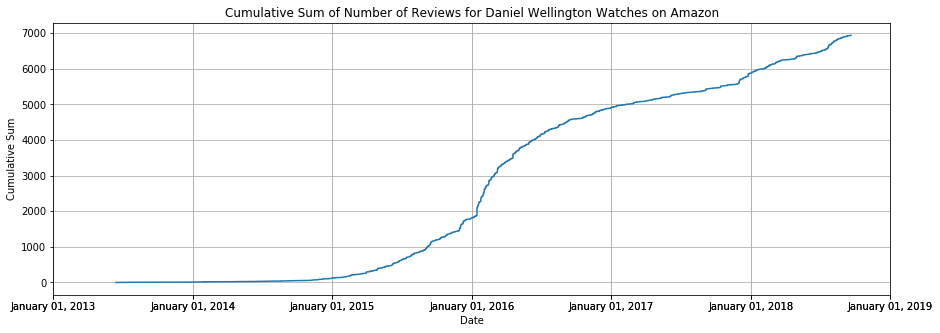

In [50]:
plt.figure(figsize=(15,5))
plt.title("Cumulative Sum of Number of Reviews for Daniel Wellington Watches on Amazon")
plt.plot(big_date,moving_sum)
plt.ylabel("Cumulative Sum")
plt.xlabel("Date")
plt.xticks(xVal,xDays)
# set_xticklabels( range(0,N,10), rotation=45 )
plt.grid()

In [101]:
scaled_sum = [5*i/max(moving_sum) for i in moving_sum]
star = [0,1,2,3,4,5]
n_rev = np.arange(0,max(moving_sum),1157)
ylabel_ = []
# print(len(n_rev))
for i in range(6):
    ylabel_.append("{} | {}".format(star[i],n_rev[i]))
print(ylabel_)

['0 | 0', '1 | 1157', '2 | 2314', '3 | 3471', '4 | 4628', '5 | 5785']


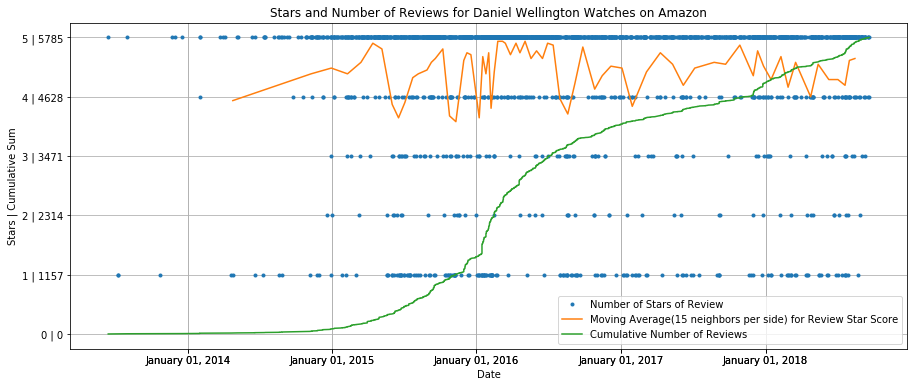

In [112]:
moving_avg = []
ma_x = []
neigh_range = 15 #increase to reduce noise
step_size = 2
for index in range(neigh_range,len(big_star)-neigh_range,1+2*neigh_range):
    ma_x.append(big_date[index])
    moving_avg.append(sum(big_star[index-neigh_range:index+neigh_range+1])/(neigh_range*2+1))
    
plt.figure(figsize=(15,6))
plt.title("Stars and Number of Reviews for Daniel Wellington Watches on Amazon")
plt.plot(big_date,big_star,'.',label="Number of Stars of Review")
# plt.ylim(0,6)
plt.ylabel("Stars | Cumulative Sum")
plt.yticks(star,ylabel_)
plt.xlabel("Date")
plt.xticks(xVal,xDays)
# plt.yticks([i for i in range(1,6)],)
# set_xticklabels( range(0,N,10), rotation=45 )
plt.plot(ma_x,moving_avg,label="Moving Average({} neighbors per side) for Review Star Score".format(neigh_range))
plt.plot(big_date,scaled_sum,label="Cumulative Number of Reviews")
plt.legend()
plt.grid()

In [36]:
n = len(big_review)
keywords = ["celebrity","promo","instagram","fake"] #and ad
keyword_dict = {}
for k in keywords:
    keyword_dict[k] = 0
for r in big_review:
    for k in keywords:
        if k in r:
            keyword_dict[k]+=1
print(keyword_dict)
word_counter = Counter('')

{'celebrity': 0, 'promo': 0, 'instagram': 0, 'fake': 66}


In [55]:
review_word_counter = Counter(''.join(big_review).lower().split(" "))
print(review_word_counter.most_common())
# print(review_word_counter)

[('the', 2551), ('and', 1791), ('i', 1634), ('a', 1518), ('it', 1389), ('is', 1196), ('watch', 1135), ('to', 963), ('this', 825), ('for', 770), ('my', 609), ('of', 602), ('with', 497), ('in', 492), ('but', 486), ('was', 468), ('very', 465), ('', 461), ('on', 407), ('that', 398), ('not', 392), ('as', 355), ('have', 337), ('love', 331), ('so', 314), ('you', 278), ('great', 277), ('watch.', 266), ('like', 258), ('looks', 250), ("it's", 233), ('be', 220), ('leather', 192), ('at', 190), ('band', 187), ('one', 183), ('good', 177), ('quality', 172), ('from', 170), ('nice', 167), ('just', 167), ('looking', 159), ('are', 156), ('will', 153), ('had', 149), ('really', 148), ('watch,', 146), ('would', 142), ('it.', 138), ('or', 137), ('wear', 136), ('than', 135), ('bought', 135), ('watches', 134), ('more', 129), ('has', 129), ('look', 128), ('/><br', 127), ('if', 124), ('face', 122), ('strap', 122), ('time', 117), ('can', 117), ('am', 115), ('when', 114), ('get', 113), ('beautiful', 109), ('no', 1